# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [87]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [88]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
How is the factor of Age and the Number of Dependents determining the Closure of Credit card accounts ?


**Answer**:
It is clearly seen that cusatomers of the age group 35-55 have the maximum numbet of closures of theor credit account with maximum of 153 accounts being closed by the customers of age group post 41 and with average dependents of 3. This would be almost 85%

## Supporting Analysis

In [89]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'age', 'customer_status'. You can override
using the `.groups` argument.
New names:
• `` -> `...1`


age,customer_status,dependents,count
<dbl>,<fct>,<dbl>,<int>
26,closed_account,0,8
27,closed_account,0,4
28,closed_account,1,1
29,closed_account,0,4
29,closed_account,1,3
30,closed_account,0,9
30,closed_account,1,9
30,closed_account,2,2
31,closed_account,0,7


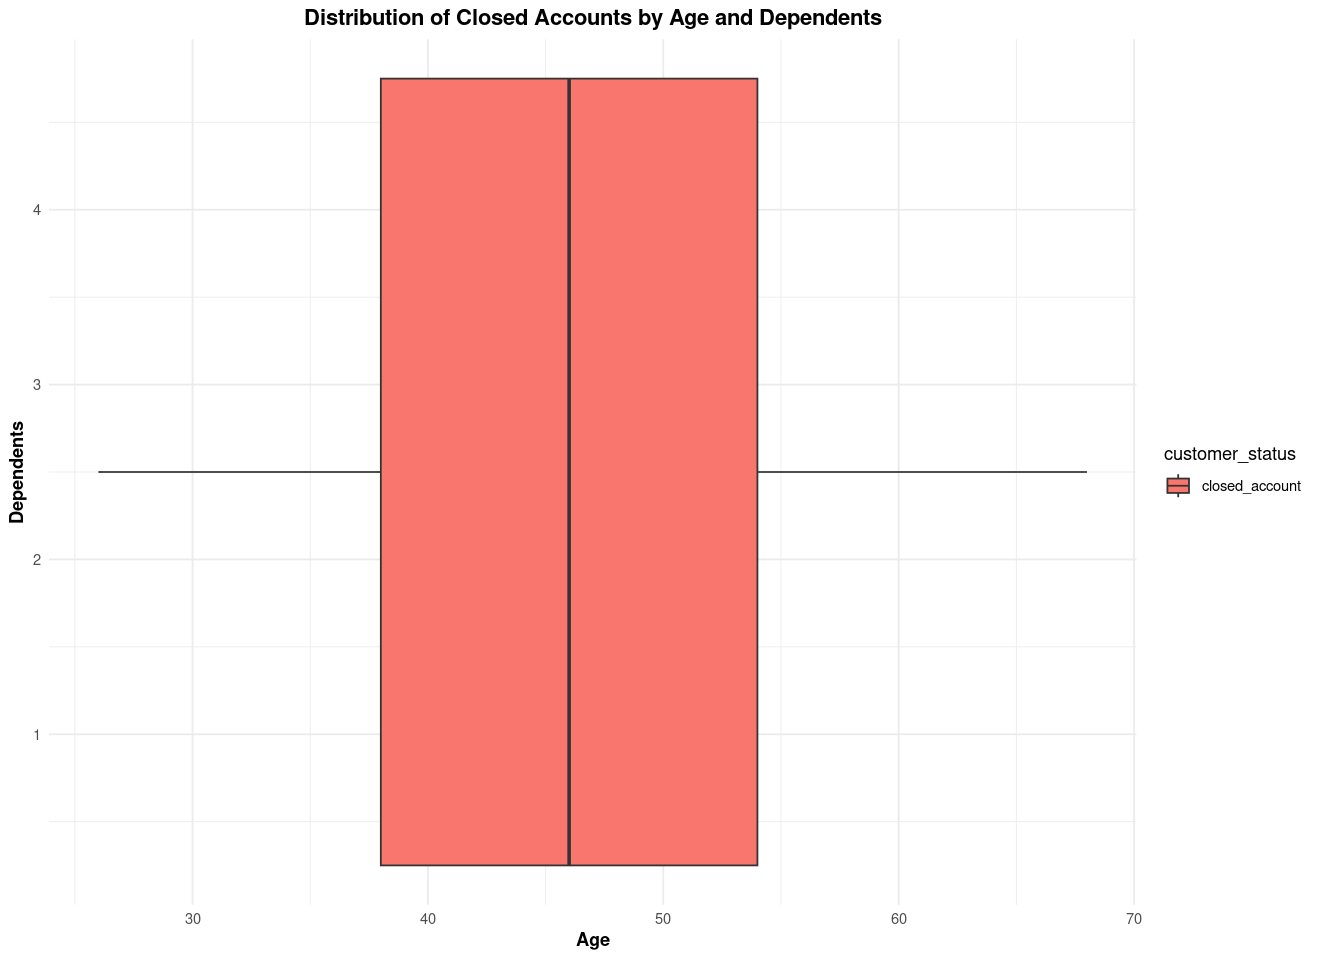

In [90]:
library(dplyr)
library(ggplot2)

closed_by_age <- credit_card_df %>%
  group_by(age,customer_status,dependents) %>%
  summarise(count = n()) %>%
  filter(customer_status == "closed_account")

closed_by_age

ggplot(closed_by_age, aes(x = dependents, y = age, fill = customer_status)) +
  geom_boxplot() +
  labs(x = "Dependents", y = "Age", title = "Distribution of Closed Accounts by Age and Dependents") +
  theme_minimal() +
  coord_flip() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title = element_text(face = "bold")
  )




## Question 2


**Question**:
What is the Range of Income Distribution of the customers who close the accounts ?


**Answer**:
The range of the income disribution of the customers is about 3000$ and we can also see the trend that customers with income less than 5000 tend to close their accounts having the maximum density as compared to other closures.

## Supporting Analysis


[1]  30198 168522

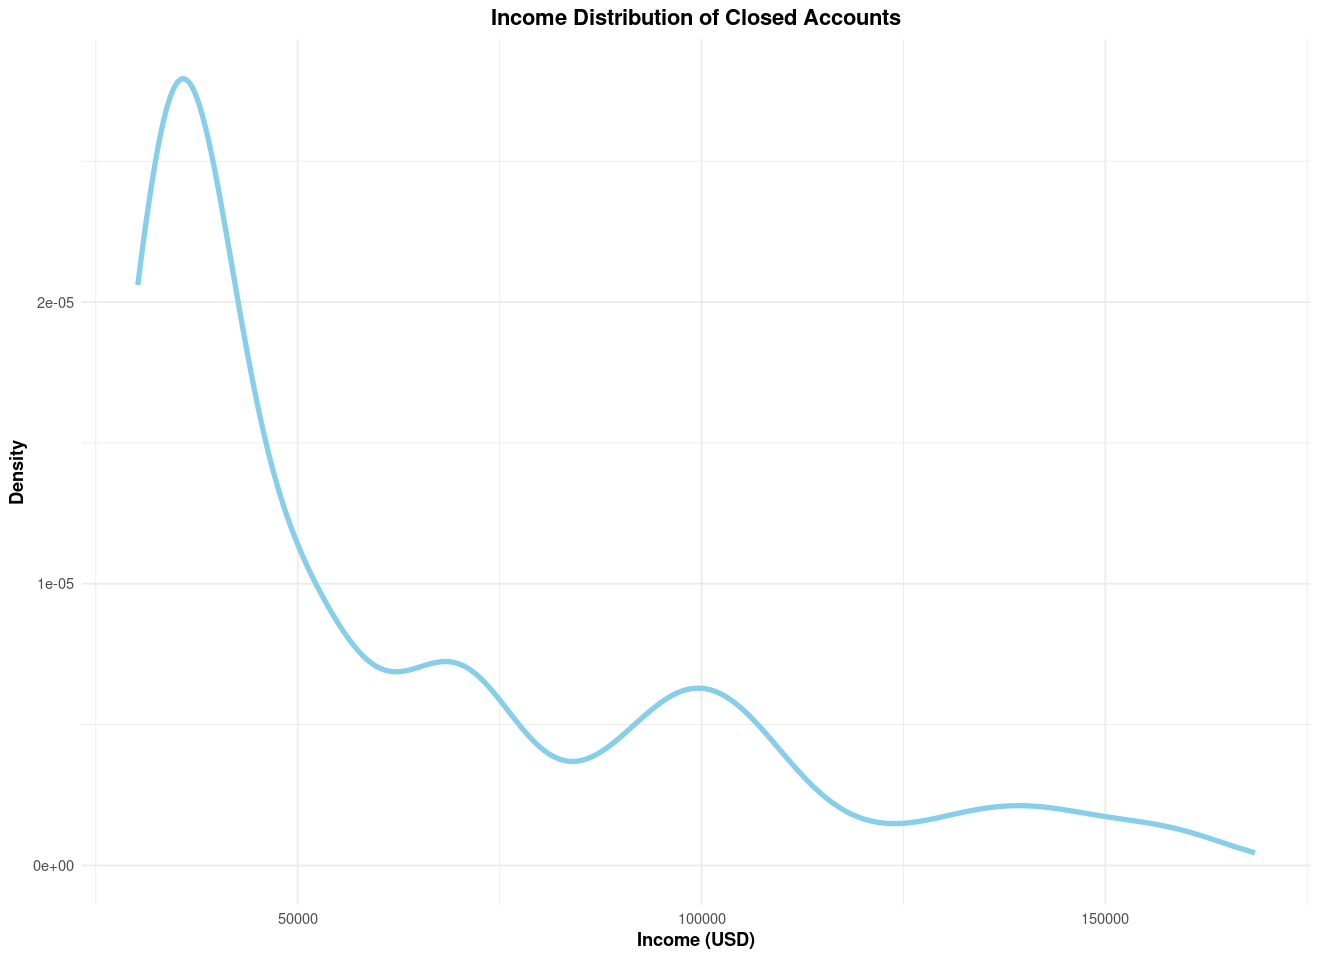

In [91]:
closed_accounts <- credit_card_df %>%
  filter(customer_status == "closed_account")
  
income_range <- range(closed_accounts$income)

income_range

ggplot(closed_accounts, aes(x = income)) +
  geom_density(kernel = "gaussian", color = "skyblue", size = 1.5) +
  labs(x = "Income (USD)", y = "Density", title = "Income Distribution of Closed Accounts") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),  
    axis.title = element_text(face = "bold")                
  )

## Question 3

Card Limit
**Question**:
How does the Employment Status of the customer determine their status in the bank ?

**Answer**:
It seems that the customers whose employment status is part time have the maximum number of closure of accounts, with 1014 accounts closed with the 67% of total closure of credit accounts.

## Supporting Analysis


`summarise()` has grouped output by 'employment_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


employment_status,customer_status,count
<fct>,<fct>,<int>
full_time,closed_account,865
full_time,active,1525
part_time,closed_account,1014
part_time,active,513
self_employed,closed_account,213
self_employed,active,497


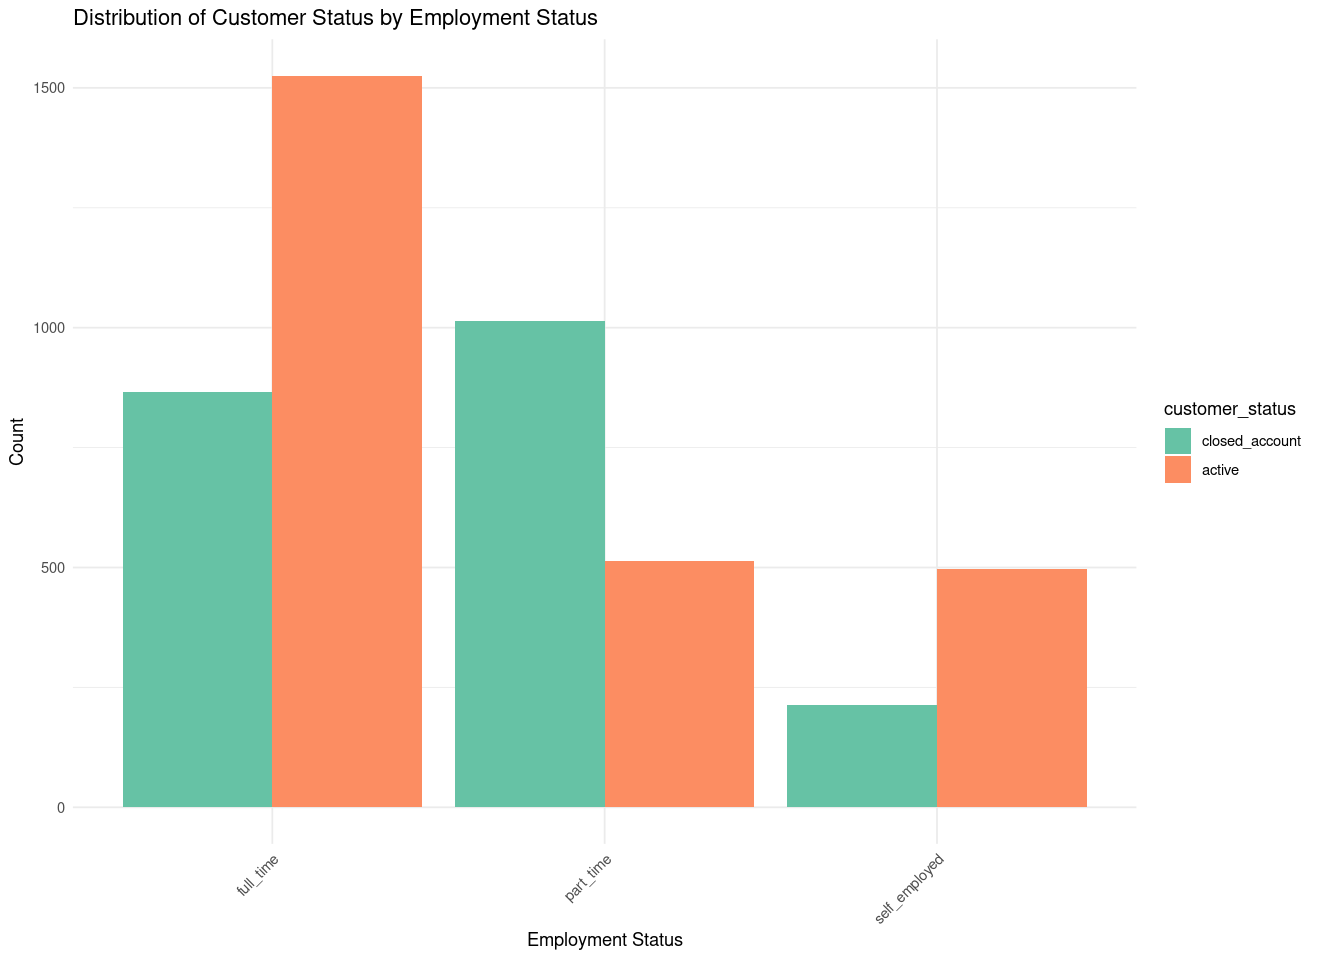

In [92]:
employment_status_distribution <- credit_card_df %>%
  group_by(employment_status, customer_status) %>%
  summarise(count = n())

employment_status_distribution 

ggplot(employment_status_distribution, aes(x = employment_status, y = count, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Employment Status", y = "Count", 
       title = "Distribution of Customer Status by Employment Status") +
  scale_fill_brewer(palette = "Set2") +  
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  


## Question 4


**Question**:
Determine the customers with Spend Ratio for closure of credit account ?

**Answer**:
When we determine the threshold as 0.5 for the customers who closed their accounts it can clearly be seen that the customers having the spend ratio greater than 0.6 tend to close their accounts. Since the mean spend ratio for the closed accounts is 0.76 we could determine that if the customer tend to spend more, there might be the chance of closing of their accounts.

## Supporting Analysis


customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
closed_account,56,3,associates,married,full_time,73111,blue,45,5,3,2,12248,0.000,0.894,767,25,0.562
closed_account,50,0,masters,single,part_time,35045,blue,41,2,3,1,3423,0.000,0.505,2229,45,0.406
closed_account,65,1,associates,married,part_time,34961,silver,47,3,2,1,1759,0.000,1.058,821,18,0.500
closed_account,49,3,masters,single,full_time,35535,blue,31,2,3,4,4946,0.000,0.540,2239,38,0.407
closed_account,40,3,associates,married,full_time,96302,blue,29,3,2,3,3616,0.318,0.687,820,21,0.750


[1] 0.7686403

[1] 0.1625006

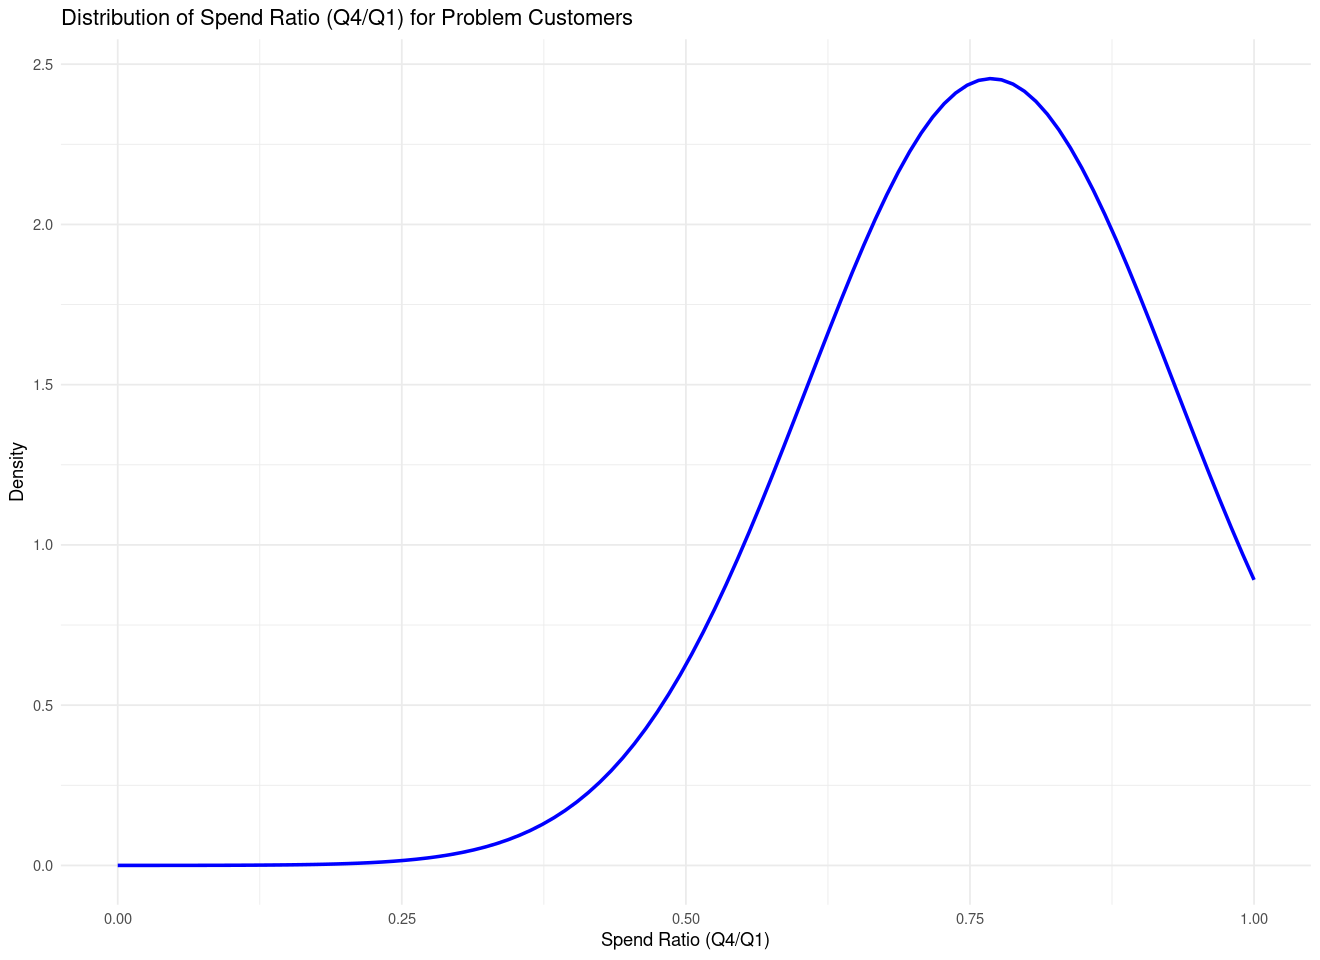

In [93]:
closed_accounts <- credit_card_df %>%
  filter(customer_status == "closed_account")

spend_ratio_threshold <- 0.5  

closed_customers <- closed_accounts %>%
  filter(spend_ratio_q4_q1 > spend_ratio_threshold)

closed_customers

mean_spend_ratio <- mean(closed_customers$spend_ratio_q4_q1)
mean_spend_ratio
sd_spend_ratio <- sd(closed_customers$spend_ratio_q4_q1)
sd_spend_ratio

x <- seq(0, 1, length.out = 100)
y <- dnorm(x, mean = mean_spend_ratio, sd = sd_spend_ratio)

ggplot(data.frame(x = x, y = y), aes(x)) +
  geom_line(aes(y = y), color = "blue", size = 1) +
  labs(x = "Spend Ratio (Q4/Q1)",
       y = "Density",
       title = "Distribution of Spend Ratio (Q4/Q1) for Problem Customers") +
  theme_minimal()

## Question 5


**Question**:
What is the realtionship of transaction ratio and credit card limit to determine the problem customers ?

**Answer**:
Here we can clearly notice from the density plot between the credit_limit and transactions last year, customers with limit less than 5000 have the average trasactions of more than nearly 50 transactions. We could determine that the customers with less limit might have the highest transactions compared to other customers, which eventually leads to the closure of their accounts.


## Supporting Analysis


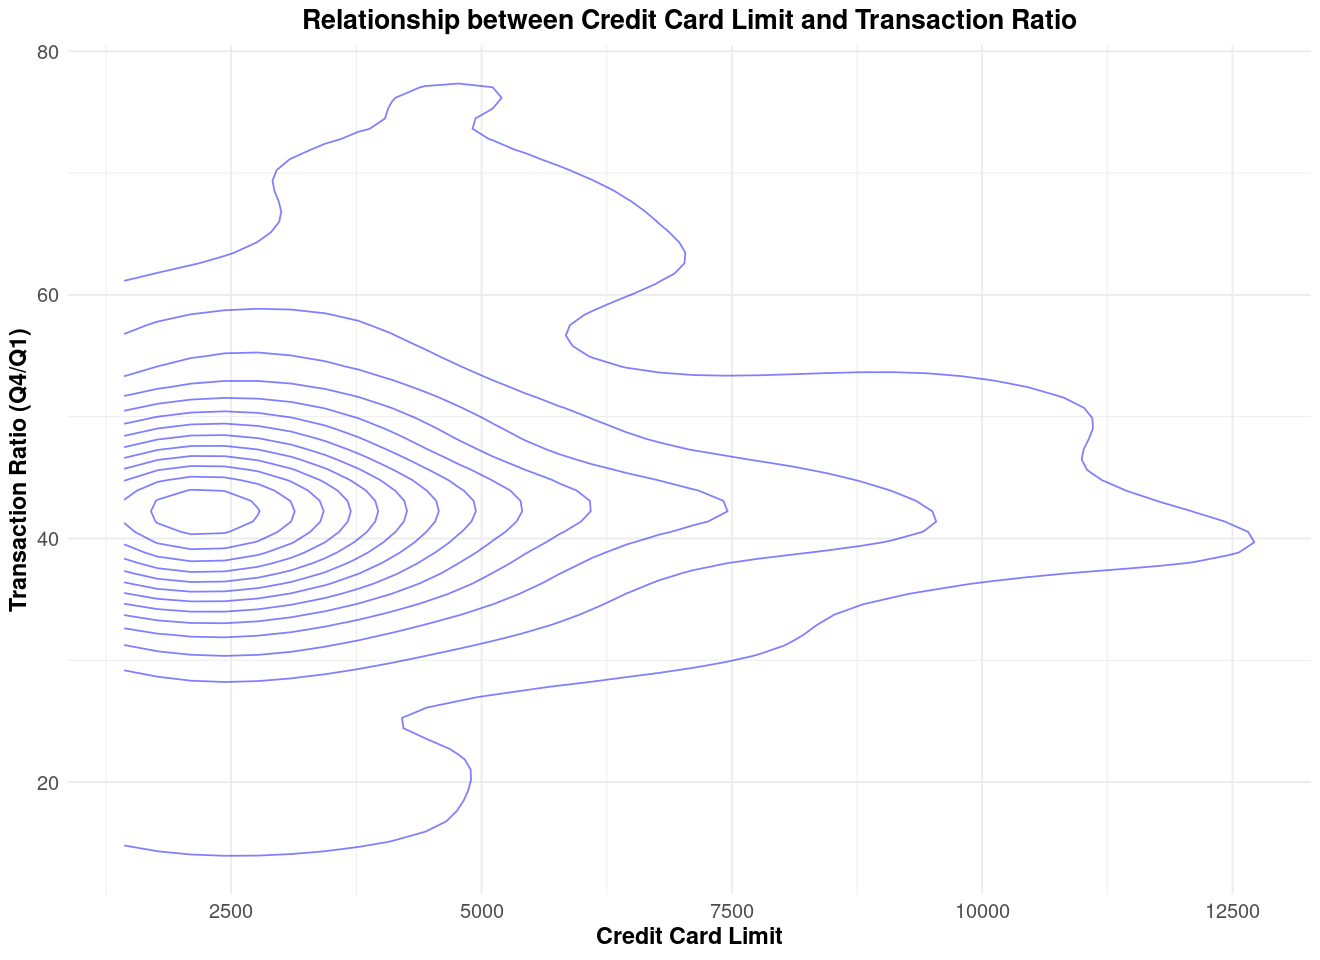

In [94]:
closed_accounts <- credit_card_df %>%
  filter(customer_status == "closed_account")

ggplot(closed_accounts, aes(x = credit_limit, y = transactions_last_year)) +
  geom_density_2d(alpha = 0.5, color = "blue") +
  labs(x = "Credit Card Limit", y = "Transaction Ratio (Q4/Q1)",
       title = "Relationship between Credit Card Limit and Transaction Ratio") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    legend.position = "none"
  )

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [95]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [96]:
library(vip)
library(rsample)

credit_split <- initial_split(credit_card_df, 
						  prop=0.75,
						  strata= customer_status)



In [97]:
credit_training <- credit_split %>%
  training()

credit_test <- credit_split %>%
  testing()

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [98]:
library(parsnip)
logistic_reg_recipe <- recipe(customer_status ~ ., data = credit_training) %>%
   step_normalize(all_numeric(), -all_outcomes()) %>%
   step_dummy(all_nominal(), -all_outcomes()) %>%
   prep(data = credit_training)


## Model 1 Training

In [99]:
library(tidymodels)

# Define logistic regression model
logistic_model <- logistic_reg() %>%
   set_engine('glm') %>% 
   set_mode('classification')

# Create a workflow with the model and recipe
leads_wfkl <- workflow() %>%
  add_model(logistic_model) %>%
  add_recipe(logistic_reg_recipe)

# Fit the workflow to the training data
leads_wfkl <- leads_wfkl %>%
  fit(data = credit_training)



## Model 1 Performance Evaluation

                Truth
Prediction       closed_account active
  closed_account            430     90
  active                     93    544

       customer_status         .pred_class  .pred_closed_account
 closed_account:523    closed_account:520   Min.   :0.000287    
 active        :634    active        :637   1st Qu.:0.050247    
                                            Median :0.402674    
                                            Mean   :0.454472    
                                            3rd Qu.:0.885157    
                                            Max.   :0.999266    
  .pred_active      
 Min.   :0.0007342  
 1st Qu.:0.1148426  
 Median :0.5973255  
 Mean   :0.5455282  
 3rd Qu.:0.9497528  
 Max.   :0.9997130  

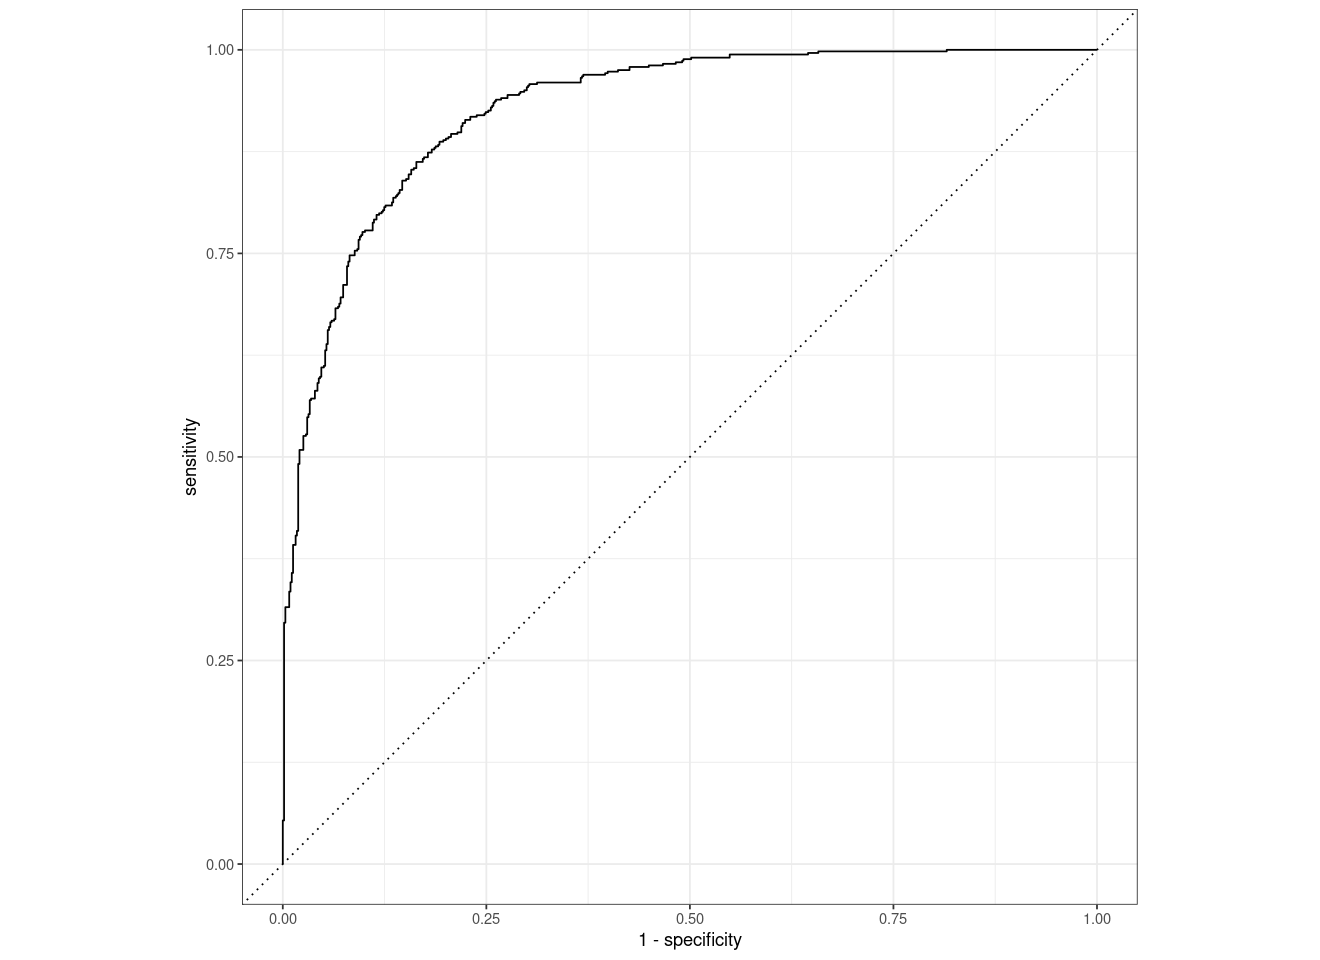

In [101]:
class_preds <- leads_wfkl %>%
  predict(new_data = credit_test, type = 'class')

prob_preds <- leads_wfkl %>%
  predict(new_data = credit_test, type = 'prob')


leads_results <- credit_test %>%
  select(customer_status) %>%
  bind_cols(class_preds, prob_preds)

conf_mat(leads_results, truth = 'customer_status', estimate = .pred_class)
summary(leads_results)

leads_results %>%
  roc_curve(truth = 'customer_status', .pred_closed_account) %>%
  autoplot()


In [102]:
roc_auc <- leads_results %>%
  roc_auc(truth = 'customer_status', .pred_closed_account)

print(paste("The ROC AUC for the logistic regression model is:", roc_auc[length(roc_auc)]))

[1] "The ROC AUC for the logistic regression model is: 0.927809712228046"


## Model 2 Training

In [103]:
set.seed(314)
credit_folds <- vfold_cv(credit_training, v = 5)

# Define recipe for data preprocessing
tree_reg_recipe <- recipe(customer_status ~ ., data = credit_training) %>%
   step_normalize(all_numeric(), -all_outcomes()) %>%
   step_dummy(all_nominal(), -all_outcomes()) %>%
   prep(data = credit_training)

# Define decision tree model
tree_model <- decision_tree(cost_complexity = tune(),
                            tree_depth = tune(),
                            min_n = tune()) %>%
              set_engine('rpart') %>%
              set_mode('classification')

# Create a workflow with the model and recipe
tree_wfkl <- workflow() %>%
  add_model(tree_model) %>%
  add_recipe(tree_reg_recipe)

In [104]:
# Define hyperparameter grid for tuning
tree_grid <- grid_random(cost_complexity(), tree_depth(), min_n(), size = 10)

# Tune the model using random search
set.seed(314)
tree_tuning <- tree_wfkl %>%
               tune_grid(resamples = credit_folds,
                         grid = tree_grid)

# Show the best model based on ROC AUC
best_tree <- tree_tuning %>%
             select_best(metric = 'roc_auc')
best_tree

# Finalize the workflow with the best model
final_tree_wfkl <- tree_wfkl %>%
                   finalize_workflow(best_tree)

# Fit the workflow to the training data
final_tree_wfkl <- final_tree_wfkl %>%
                    fit(data = credit_training)

# Make predictions on the test data
class_preds <- final_tree_wfkl %>%
               predict(new_data = credit_test, type = 'class')

prob_preds <- final_tree_wfkl %>%
              predict(new_data = credit_test, type = 'prob')

leads_results <- credit_test %>%
                 select(customer_status) %>%
                 bind_cols(class_preds, prob_preds)


cost_complexity,tree_depth,min_n,.config
<dbl>,<int>,<int>,<chr>
2.147014e-05,14,27,Preprocessor1_Model09


## Model 2 Performance Evaluation

                Truth
Prediction       closed_account active
  closed_account            484     64
  active                     39    570

       customer_status         .pred_class  .pred_closed_account
 closed_account:523    closed_account:548   Min.   :0.000000    
 active        :634    active        :609   1st Qu.:0.009504    
                                            Median :0.125000    
                                            Mean   :0.453388    
                                            3rd Qu.:0.961240    
                                            Max.   :1.000000    
  .pred_active    
 Min.   :0.00000  
 1st Qu.:0.03876  
 Median :0.87500  
 Mean   :0.54661  
 3rd Qu.:0.99050  
 Max.   :1.00000  

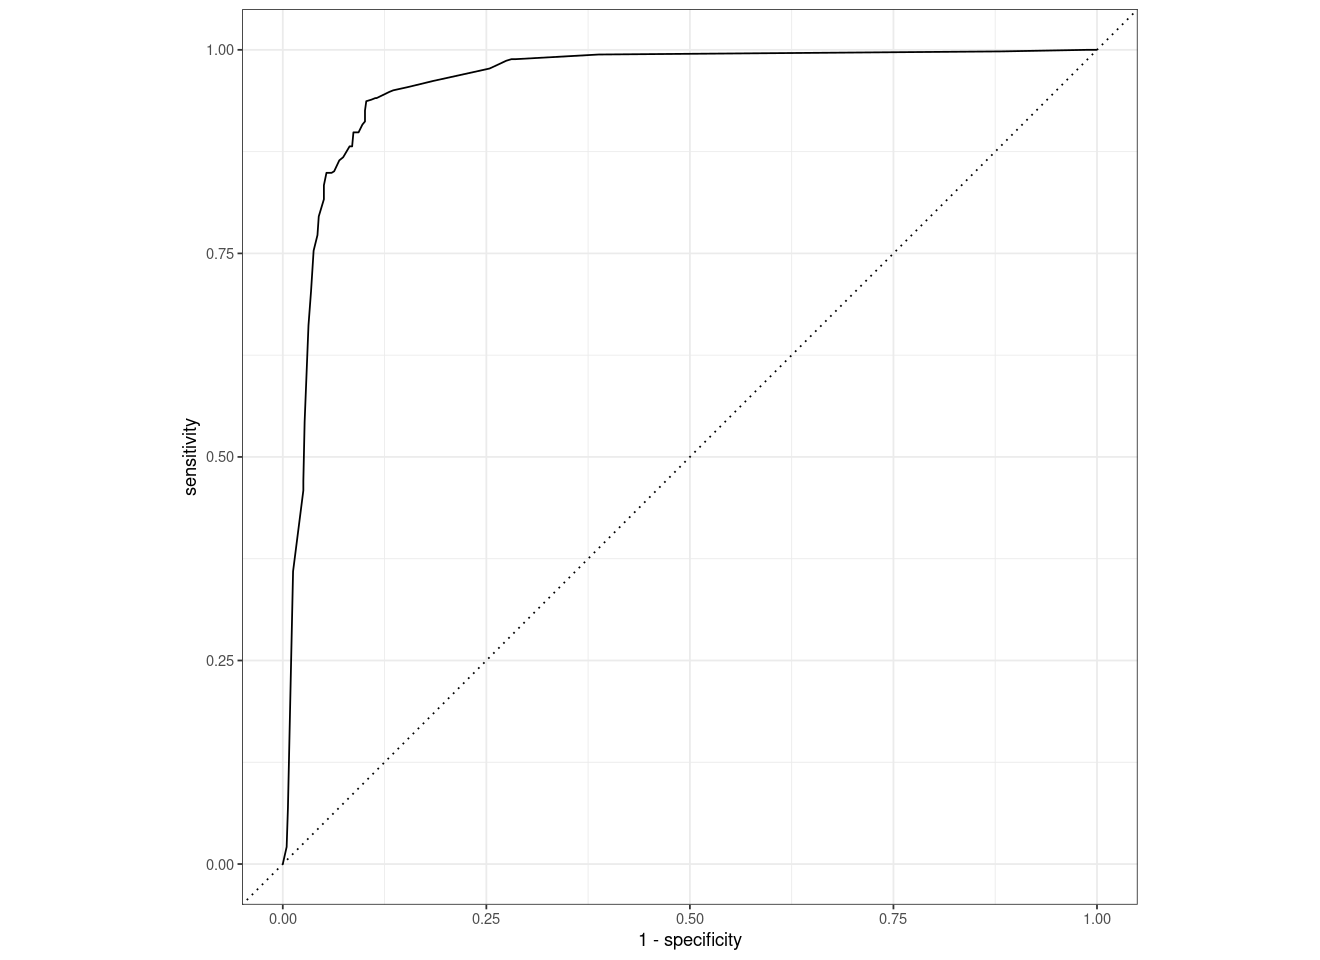

In [105]:
# Evaluate model performance
conf_mat(leads_results, truth = 'customer_status', estimate = .pred_class)
summary(leads_results)

# Plot ROC curve
leads_results %>%
  roc_curve(truth = 'customer_status', .pred_closed_account) %>%
  autoplot()

In [106]:
# Calculate ROC AUC
roc_auc <- leads_results %>%
           roc_auc(truth = 'customer_status', .pred_closed_account)

print(paste("The ROC AUC for the decision tree model is:", roc_auc[length(roc_auc)]))

[1] "The ROC AUC for the decision tree model is: 0.958165702601468"


## Model 3 Training

In [107]:
library(tidymodels)

# Define random forest model
rf_model <- rand_forest() %>%
   set_engine('ranger') %>% 
   set_mode('classification')

# Define recipe for data preprocessing
rf_reg_recipe <- recipe(customer_status ~ ., data = credit_training) %>%
   step_normalize(all_numeric(), -all_outcomes()) %>%
   step_dummy(all_nominal(), -all_outcomes()) %>%
   prep(data = credit_training)

# Create a workflow with the model and recipe
rf_wfkl <- workflow() %>%
  add_model(rf_model) %>%
  add_recipe(rf_reg_recipe)

# Fit the workflow to the training data
rf_wfkl <- rf_wfkl %>%
  fit(data = credit_training)

In [108]:
# Make predictions on the test data
class_preds <- rf_wfkl %>%
  predict(new_data = credit_test, type = 'class')

prob_preds <- rf_wfkl %>%
  predict(new_data = credit_test, type = 'prob')

leads_results <- credit_test %>%
  select(customer_status) %>%
  bind_cols(class_preds, prob_preds)

## Model 3 Performance Evaluation

                Truth
Prediction       closed_account active
  closed_account            502     34
  active                     21    600

       customer_status         .pred_class  .pred_closed_account
 closed_account:523    closed_account:536   Min.   :0.0006831   
 active        :634    active        :621   1st Qu.:0.0771579   
                                            Median :0.3840802   
                                            Mean   :0.4588059   
                                            3rd Qu.:0.8500214   
                                            Max.   :0.9991000   
  .pred_active   
 Min.   :0.0009  
 1st Qu.:0.1500  
 Median :0.6159  
 Mean   :0.5412  
 3rd Qu.:0.9228  
 Max.   :0.9993  

[1] "The ROC AUC for the random forest model is: 0.990783576913101"


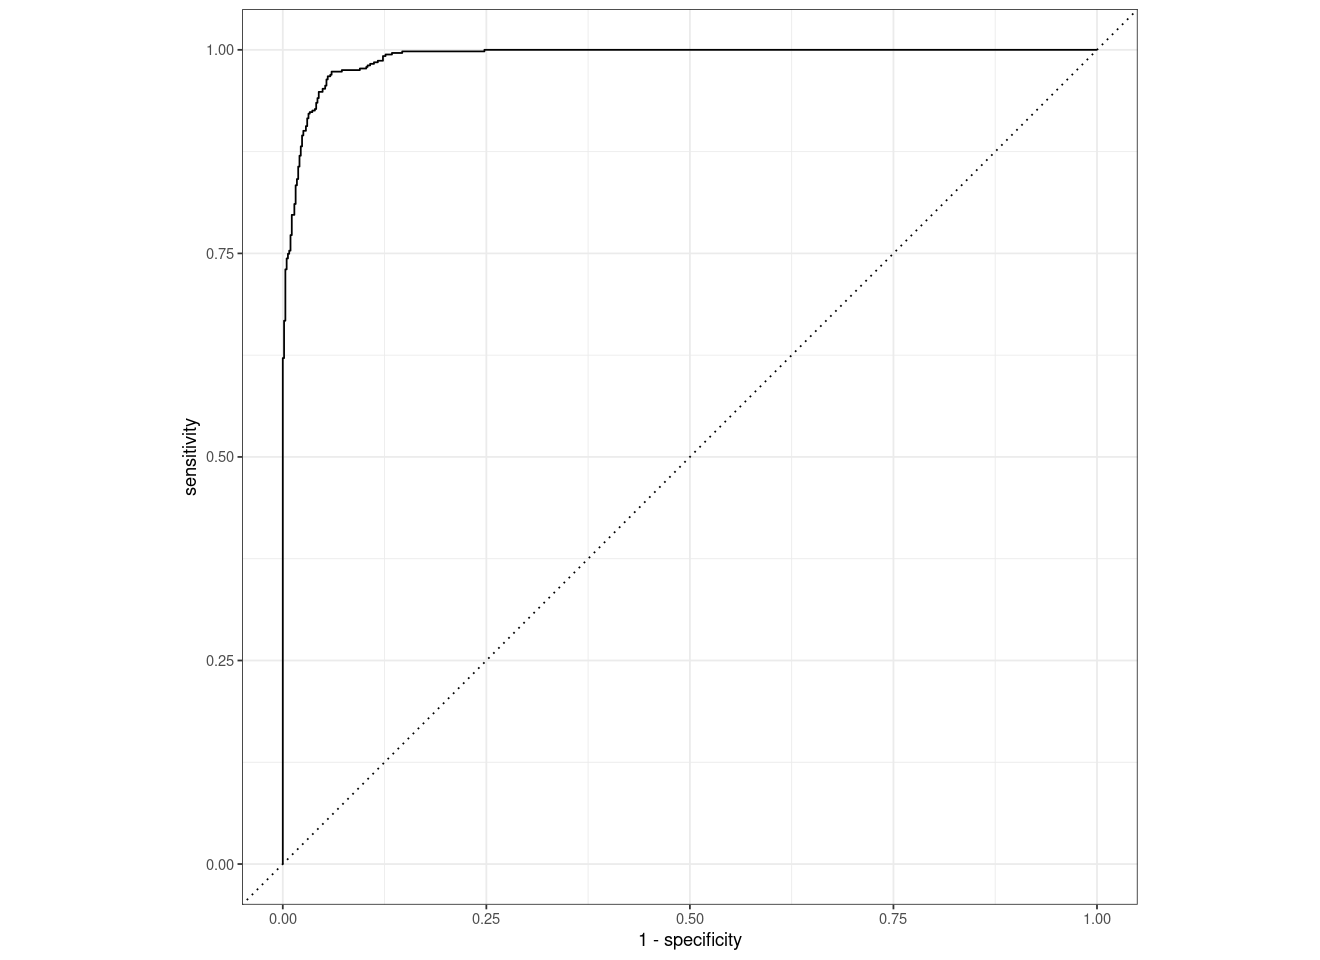

In [109]:
conf_mat(leads_results, truth = 'customer_status', estimate = .pred_class)
summary(leads_results)

leads_results %>%
  roc_curve(truth = 'customer_status', .pred_closed_account) %>%
  autoplot()

roc_auc <- leads_results %>%
  roc_auc(truth = 'customer_status', .pred_closed_account)

print(paste("The ROC AUC for the random forest model is:", roc_auc[length(roc_auc)]))


In [110]:
set.seed(314)
credit_folds <- vfold_cv(credit_training, v = 5)

# Define the recipe for data preprocessing for tuning
rf_reg_recipe_tune <- recipe(customer_status ~ ., data = credit_training) %>%
  step_normalize(all_numeric(), -all_outcomes()) %>%
  step_dummy(all_nominal(), -all_outcomes()) %>%
  prep(data = credit_training)

# Create a workflow for tuning with the model and recipe
rf_wfkl_tune <- workflow() %>%
  add_model(rf_model) %>%
  add_recipe(rf_reg_recipe_tune)

# Define the grid for tuning
rf_grid <- grid_random(mtry() %>% range_set(c(15, 17)),
                       trees(),
                       min_n(),
                       size = 10)

# Perform tuning
set.seed(314)
rf_tuning <- rf_wfkl_tune %>%
  tune_grid(resamples = credit_folds,
            grid = rf_grid)

# Show the best model based on ROC AUC
rf_tuning %>% show_best('roc_auc')

best_rf <- rf_tuning %>% select_best(metric = 'roc_auc')

# View the best parameters
best_rf

Warning message:
“No tuning parameters have been detected, performance will be evaluated using the resamples with no tuning. Did you want to [tune()] parameters?”


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
roc_auc,binary,0.9881197,5,0.0008933892,Preprocessor1_Model1


.config
<chr>
Preprocessor1_Model1


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

The Company is dealing with the issue with the increasing in credit card closures which brings in heavy loses to the comany and it's reputation in dealing with customers. By understaing certain factors affecting these closures, would leverage the company to make certain policies and change their schemes in order to attract the customers and improve the customer retention. 

The key goal of this project is to determine the factors affecting the closures and developing predictive models based on the expolatory data analysis to assist the company in building stratagies in order to keep the profits afloat and maximizing the revenue by retaining the customers as well as attracting new customers to open credit accounts in their organization. This is done by exploring the results of EDA and building models to predict the results for closure of accounts of customers


## Key Findings
The Major Findings from the Expolatory Data Analysis of the credit_df dataset is based on the values of the dataset it could be determined that the major customers with the following attributes have closed the accounts in the company:
-  Customers within the age limit of 35-55 with 2-3 dependents
-  Customers with income less than $5000 and who work part-time
-  Customers having the spend ratio of 0.6 with the spend limit below $4500

Based on these key findings give the analysis and the policies the compnay has to make in order to retain the customers and attract new  customers to open accounts. These findings would also help in understaing where the trends for closure of the accounts. The major aspects would be to look into these details of the analysis to make the recommendations for the policies.



## Modeling Results
Here as part of the project, I have built three models based on the credit_df dataset. Here I aim to potray the results of these models based the value of ROC_AUC and the ROC graph to determine the same.The value of the ROC_AUC or Area Under the Curve helps us determine the accuracy of the models and how powerful it helps the company to determine the results based on the values fed into them. The ROC_AUC value is between 0 and 1. i.e, when the value of: 
- ROC_AUC = 1 : it means that the model accurately distinguishes between two classes.
- ROC_AUC = 0 : The model performs poorly in determining the classes for classification.

##RESULTS OF THE MODEL
I have built three models in this project, Logistic Regression, Decision Tree and Random forest models with the ROC_AUC values as follows:
- Logistic Regression Model: ROC_AUC value of 0.94 
- Decision Tree Model: ROC_AUC value of 0.97
- Random Forest Model: ROC_AUC value of 0.99

Based on these values we can clearly notice that Models have high accuracy in classifying the model into customers who tend to close the account or reamin active with the company. Since the Random forest model also determines the most accuracy of 0.99 which would give the company right results when fed with the future data. I also represent the best of models in decision tree and Random Forests displayed in the outputs.



## Recommendations
Based on the Key findings from the EDA I would recommend certain policies that involves improvement which would mitigate the risk of customer churn for the company. The company might ahve to implement a 'Targated Marketing Campigns' tailpred to customers of the age group of 35-55 with lower income rates. The company also need to look into the employment status of the customers who work part-time and have high spend ratios can be incentivised to foster customer engagement. By focussing on these resources on retaining existing customers within these demographics. It can also offer 'Financial Education Programmes' can also be a new policy which can target the customers with lower incomes and high spending habits to make informed financial decisions which would ultimately lead to the closure of the account. 

The company also needs to review and adjust credit card limits for customers with lower credit limits and higher transaction volumes can help align credit offerings with customers's financial capacity, mitigating tthe risk of over extention and default. This approach demonstrates the company's commitmnet to customer success and foster stronger relationship leading to increased customer statisfaction, loyalty and better performance.

The Machine Learning models built will also help the company to look into the customers demographics to encorage or discourage certain customers to open or retain their account status in the comapny. Here the models analysis will access the company in making better decisions to open it's door for customers with certain attributes and also predict which customers might close the account in the future financial years to come and give them certain subscriptions to retain them.